# Univariate Selection of f_classif

In [163]:
import numpy as np
import pandas as pd

In [132]:
df= pd.read_csv('E:/dataset/mock_dataset.csv')
df.head(10)

,Country,Age,Salary,Purchased
0,Bangladesh,23,24400,No
1,America,64,23000,No
2,India,55,45000,No
3,South-Africa,23,456000,No
4,Nepal,87,43000,Yes
5,Australia,89,670000,Yes
6,China,45,3346000,Yes
7,France,13,346000,No
8,Japan,77,234000,Yes
9,Brazil,34,677000,No


In [167]:
x = df[['Age','Salary']]


In [168]:
y=df[['Purchased']]


In [135]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

FEATURES = SelectKBest(score_func = f_classif)

FEATURES.fit(x,y)

C:\Users\raiha\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=2. All the features will be returned.
  warnings.warn(
C:\Users\raiha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest()

In [169]:
score=pd.DataFrame(FEATURES.scores_,columns = ["Scores"])
#score

In [170]:
data= x.columns
col_name=pd.DataFrame(data,columns = ["Features"])
#col_name

In [138]:
Features_score= pd.concat([col_name,score],axis=1)
Features_score # Higher the score importent the feature

,Features,Scores
0,Age,11.336967
1,Salary,1.966390


# Univariate Selection of chi-square

In [139]:
df= pd.read_csv('E:/dataset/hotel data file/Hotel_booking_short.csv')
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,...,0.000000,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,...,0.000000,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,...,75.000000,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,...,75.000000,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,...,98.000000,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0


In [140]:
df.isnull().sum() # to check null values in the column
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,...,0.000000,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,...,0.000000,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,...,75.000000,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,...,75.000000,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,...,98.000000,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0


In [171]:
a=pd.DataFrame(df.columns) # to check how many columns are there
#a

In [142]:
df['hotel'].mode()[0]  #1 data on a particular row occurs how many times

'Resort Hotel'

In [143]:
# Removing few columns that we know not importent
df.drop(['arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','agent','company','babies','meal','email',
'phone-number','hotel','arrival_date_year',	'arrival_date_month','credit_card','name','adr','lead_time','market_segment','deposit_type','total_of_special_requests','reservation_status'],axis= 1,inplace=True)
df.head()

,adults,children,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,reservation_status_date,is_canceled
0,2,0,PRT,Direct,0,0,0,C,C,3,0,Transient,0,7/1/2015,0
1,2,0,PRT,Direct,0,0,0,C,C,4,0,Transient,0,7/1/2015,0
2,1,0,GBR,Direct,0,0,0,A,C,0,0,Transient,0,7/2/2015,0
3,1,0,GBR,Corporate,0,0,0,A,A,0,0,Transient,0,7/2/2015,0
4,2,0,GBR,TA/TO,0,0,0,A,A,0,0,Transient,0,7/3/2015,0


In [144]:
# fill the null values
for col in df.columns:
  df[col]= df[col].fillna(df[col].mode()[0]) # null values will fill up by mode
df.head()    

,adults,children,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,reservation_status_date,is_canceled
0,2,0,PRT,Direct,0,0,0,C,C,3,0,Transient,0,7/1/2015,0
1,2,0,PRT,Direct,0,0,0,C,C,4,0,Transient,0,7/1/2015,0
2,1,0,GBR,Direct,0,0,0,A,C,0,0,Transient,0,7/2/2015,0
3,1,0,GBR,Corporate,0,0,0,A,A,0,0,Transient,0,7/2/2015,0
4,2,0,GBR,TA/TO,0,0,0,A,A,0,0,Transient,0,7/3/2015,0


In [145]:
df.isnull().sum() # All null values are removed

adults                            0
children                          0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
reservation_status_date           0
is_canceled                       0
dtype: int64

In [146]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df= df.apply(LE.fit_transform) # replace with 0 or 1 if T/F or number
df.head()

,adults,children,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,reservation_status_date,is_canceled
0,1,0,4,1,0,0,0,1,1,2,0,1,0,3,0
1,1,0,4,1,0,0,0,1,1,3,0,1,0,3,0
2,0,0,2,1,0,0,0,0,1,0,0,1,0,4,0
3,0,0,2,0,0,0,0,0,0,0,0,1,0,4,0
4,1,0,2,2,0,0,0,0,0,0,0,1,0,5,0


In [147]:
# feature in x and target in y
from sklearn.feature_selection import chi2
x=df.drop(columns=['is_canceled'],axis=1) # import features in x dropping the target
y=df['is_canceled'] # import target in y

In [148]:
chi_scores = chi2(x,y)
chi_scores

(array([6.75000000e-02, 1.50000000e-01, 8.33333333e-01, 6.35294118e-01,
                   nan,            nan,            nan, 4.76190476e-02,
        1.91666667e-01, 1.20000000e+00,            nan, 6.81818182e-03,
                   nan, 1.03213636e+01]),
 array([0.79501217, 0.69853536, 0.36131043, 0.42542002,        nan,
               nan,        nan, 0.82725935, 0.66153307, 0.27332168,
               nan, 0.93419164,        nan, 0.00131499]))

In [153]:
chi_values=pd.DataFrame(chi_scores[0], index=x.columns, columns=['Chi_Score']) # chi score
chi_values

,Chi_Score
adults,0.067500
children,0.150000
country,0.833333
distribution_channel,0.635294
is_repeated_guest,NaN
previous_cancellations,NaN
previous_bookings_not_canceled,NaN
reserved_room_type,0.047619
assigned_room_type,0.191667
booking_changes,1.200000


In [154]:
pd.options.display.float_format = '{:6f}'.format

In [158]:
chi_values.sort_values(by ='Chi_Score',ascending=False, inplace=True) # descending order
chi_values

,Chi_Score
reservation_status_date,10.321364
booking_changes,1.200000
country,0.833333
distribution_channel,0.635294
assigned_room_type,0.191667
children,0.150000
adults,0.067500
reserved_room_type,0.047619
customer_type,0.006818
is_repeated_guest,NaN


<Axes: >

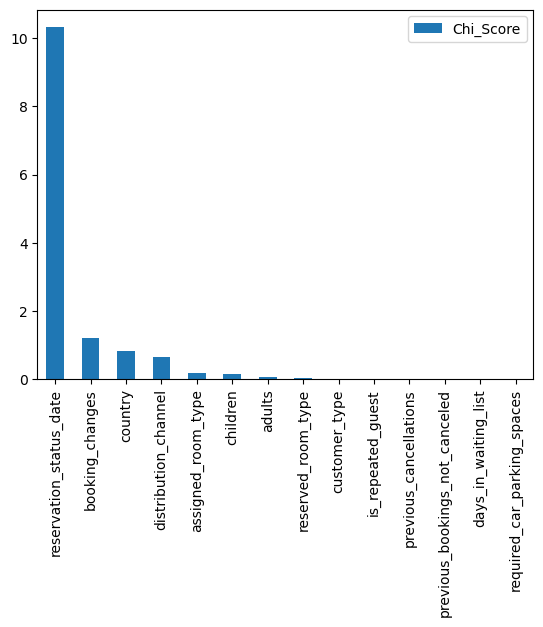

In [159]:
chi_values.plot.bar()

In [152]:
Pre_Values=pd.DataFrame(chi_scores[1], index=x.columns, columns=['Pre Values']) #Pre Values
Pre_Values

,Pre Values
adults,0.795012
children,0.698535
country,0.361310
distribution_channel,0.425420
is_repeated_guest,NaN
previous_cancellations,NaN
previous_bookings_not_canceled,NaN
reserved_room_type,0.827259
assigned_room_type,0.661533
booking_changes,0.273322


In [161]:
Pre_Values.sort_values(by ='Pre Values',ascending=True, inplace=True) # lesser pre values are more importent 
Pre_Values

,Pre Values
reservation_status_date,0.001315
booking_changes,0.273322
country,0.361310
distribution_channel,0.425420
assigned_room_type,0.661533
children,0.698535
adults,0.795012
reserved_room_type,0.827259
customer_type,0.934192
is_repeated_guest,NaN


<Axes: >

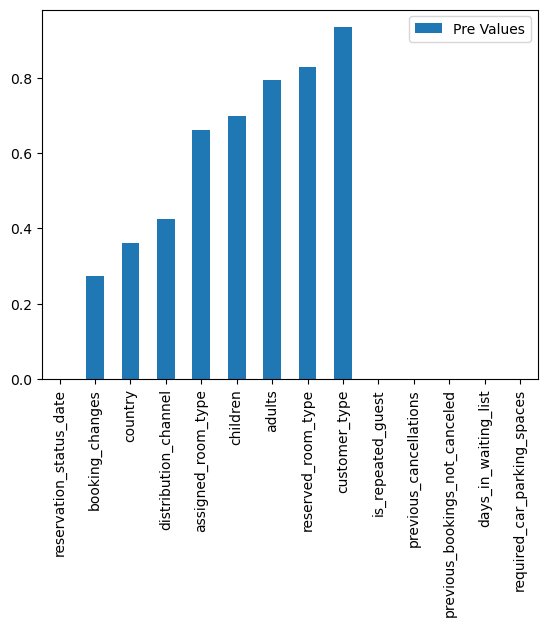

In [162]:
Pre_Values.plot.bar()

# Univariate Selection of mutual info classif

In [164]:
df= pd.read_csv('E:/dataset/mock_dataset.csv')
df.head(10)

,Country,Age,Salary,Purchased
0,Bangladesh,23,24400,No
1,America,64,23000,No
2,India,55,45000,No
3,South-Africa,23,456000,No
4,Nepal,87,43000,Yes
5,Australia,89,670000,Yes
6,China,45,3346000,Yes
7,France,13,346000,No
8,Japan,77,234000,Yes
9,Brazil,34,677000,No


In [166]:
x = df[['Age','Salary']]
y=df[['Purchased']]

In [173]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\raiha\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier()

In [174]:
model.feature_importances_

array([0.65081009, 0.34918991])

# Correlation Matrix with Heat Map